## Решающие деревья

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Решение должно содержать:
* Ноутбук homework-practice-05-Username.ipynb
* Модуль hw5code.py

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [39]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

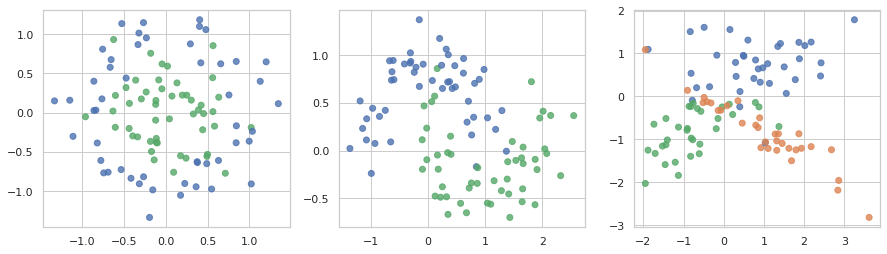

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(ax, clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

0.7878787878787878
0.8787878787878788
0.8181818181818182


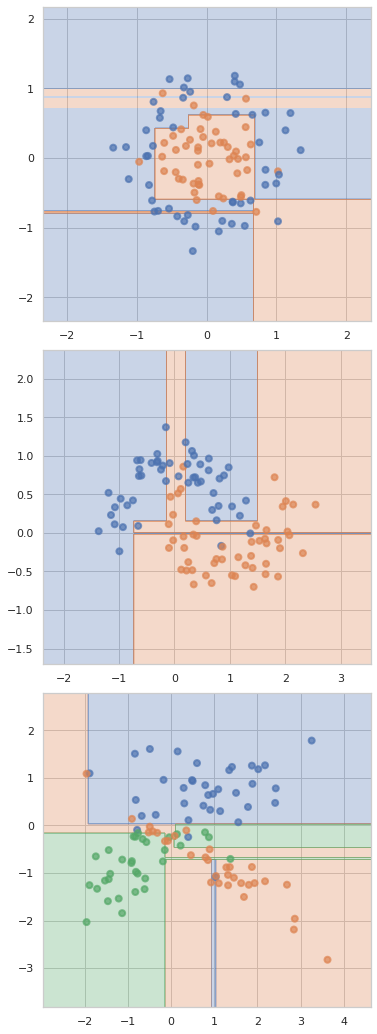

In [6]:
fig, axs = plt.subplots(3, 1)
fig.set_figheight(15)
i = 0
for dataset in datasets:
    X = dataset[0]
    y = dataset[1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    plot_surface(axs[i], dt, X, y)
    print(dt.score(X_test, y_test))
    i += 1

**Результат на тестовой выборке достаточно неплохой, но по графику видно, что деревья сильно переобучились**

__2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [7]:
X, y = datasets[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

При max_depth =  2 accuracy на обучающей выборке:  0.9253731343283582 accuracy на тестовой выборке:  0.9090909090909091
При max_depth =  3 accuracy на обучающей выборке:  0.9253731343283582 accuracy на тестовой выборке:  0.9090909090909091
При max_depth =  4 accuracy на обучающей выборке:  1.0 accuracy на тестовой выборке:  0.8787878787878788
При max_depth =  5 accuracy на обучающей выборке:  1.0 accuracy на тестовой выборке:  0.8787878787878788


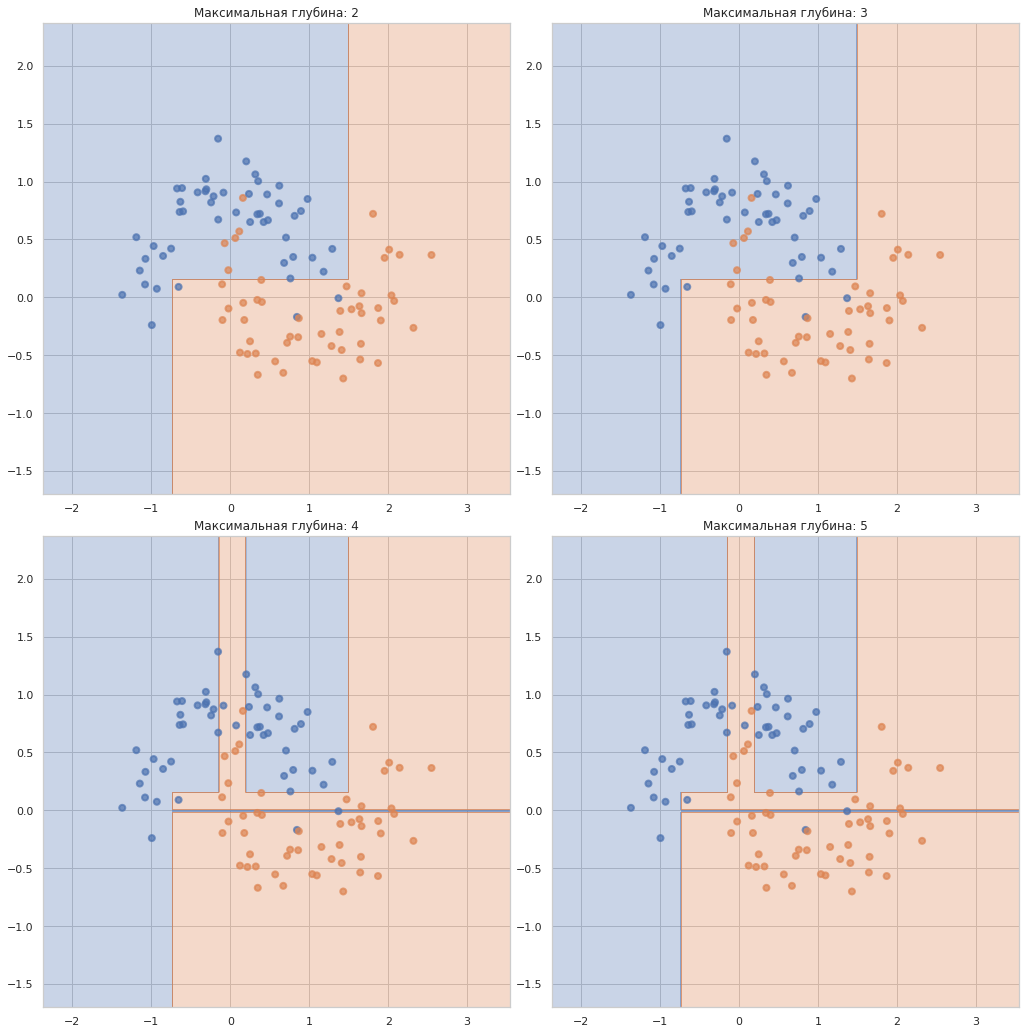

In [8]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(15, 15, forward=True)
for depth in range(2, 6):
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    print('При max_depth = ', depth, 'accuracy на обучающей выборке: ', dt.score(X_train, y_train),
         'accuracy на тестовой выборке: ', dt.score(X_test, y_test))
    plot_surface(axs[depth//2-1, depth%2], dt, X, y)
    axs[depth//2-1, depth%2].set_title('Максимальная глубина: ' + str(depth))

In [9]:
X, y = datasets[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

При min_samples_leaf =  1 accuracy на обучающей выборке:  1.0 accuracy на тестовой выборке:  0.7575757575757576
При min_samples_leaf =  2 accuracy на обучающей выборке:  0.9402985074626866 accuracy на тестовой выборке:  0.8787878787878788
При min_samples_leaf =  3 accuracy на обучающей выборке:  0.9402985074626866 accuracy на тестовой выборке:  0.7878787878787878
При min_samples_leaf =  4 accuracy на обучающей выборке:  0.8805970149253731 accuracy на тестовой выборке:  0.9090909090909091
При min_samples_leaf =  5 accuracy на обучающей выборке:  0.835820895522388 accuracy на тестовой выборке:  0.9090909090909091
При min_samples_leaf =  6 accuracy на обучающей выборке:  0.8208955223880597 accuracy на тестовой выборке:  0.9090909090909091
При min_samples_leaf =  7 accuracy на обучающей выборке:  0.8208955223880597 accuracy на тестовой выборке:  0.8181818181818182
При min_samples_leaf =  8 accuracy на обучающей выборке:  0.8208955223880597 accuracy на тестовой выборке:  0.8181818181818182


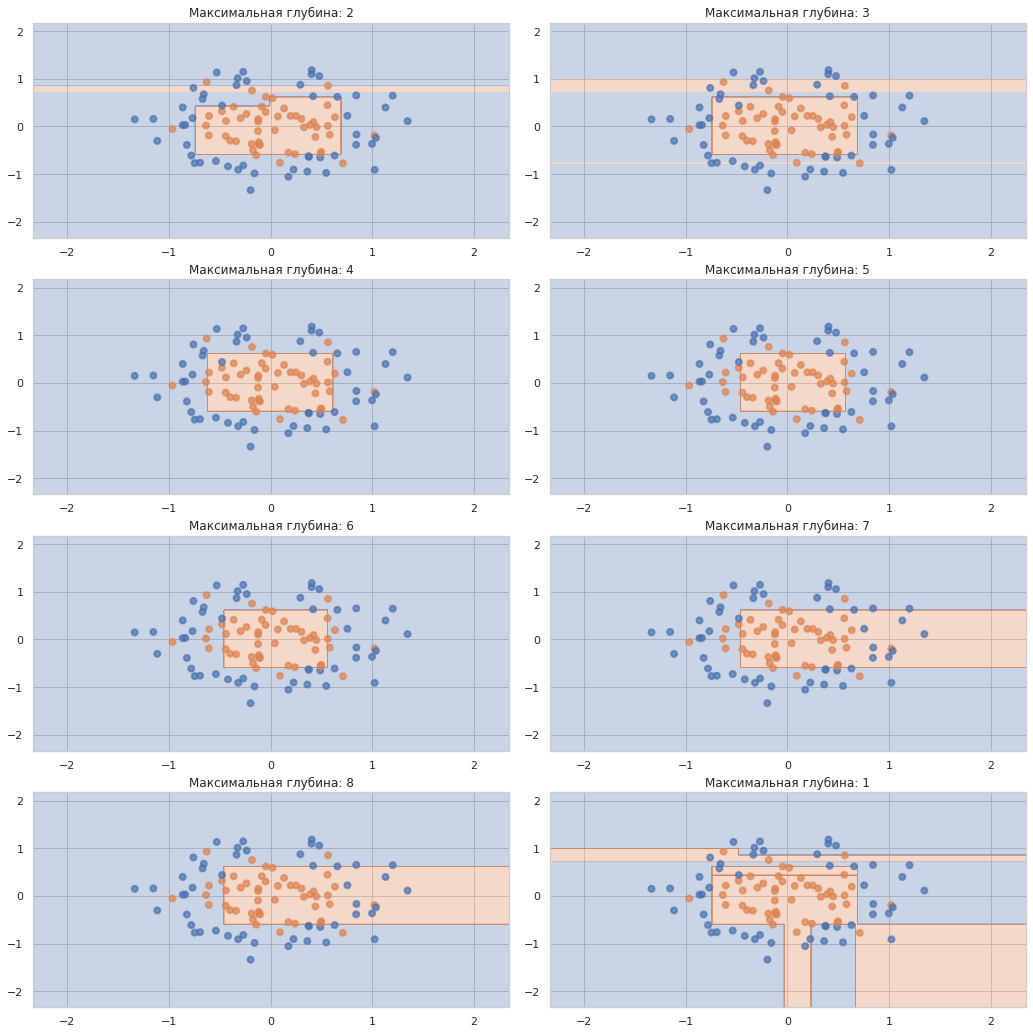

In [11]:
fig, axs = plt.subplots(4, 2)
fig.set_size_inches(15, 15, forward=True)
for n_samples_leaf in range(1, 9):
    dt = DecisionTreeClassifier(min_samples_leaf=n_samples_leaf)
    dt.fit(X_train, y_train)
    print('При min_samples_leaf = ', n_samples_leaf,
          'accuracy на обучающей выборке: ', dt.score(X_train, y_train),
          'accuracy на тестовой выборке: ', dt.score(X_test, y_test))
    plot_surface(axs[n_samples_leaf//2-1, n_samples_leaf%2], dt, X, y)
    axs[n_samples_leaf//2-1, n_samples_leaf%2].set_title('Максимальная глубина: ' + str(n_samples_leaf))

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

In [12]:
import hw5code

__3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

Под критерием Джини здесь подразумевается следующая функция:

$Q(R) = -\frac{|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$

$R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,

$H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

    Указания:
    * Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    * В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
    * Поведение функции в случае константного признака может быть любым.
    * При одинаковых приростах Джини нужно выбирать минимальный сплит.
    * За наличие в функции циклов балл будет снижен. Векторизуйте! :)

    :param feature_vector: вещественнозначный вектор значений признака
    :param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)

    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно разделить на две различные подвыборки, или поддерева
    :return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
    :return threshold_best: оптимальный порог (число)
    :return gini_best: оптимальное значение критерия Джини (число)

__4. (0.5 балла)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [13]:
students_train = pd.read_excel('students.xls', sheet_name=1)
students_test = pd.read_excel('students.xls', sheet_name=2)
students_train.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


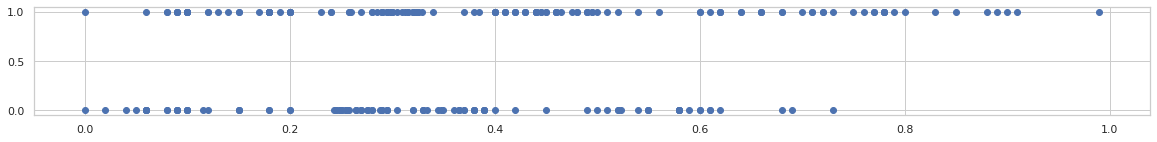

In [14]:
plt.figure(figsize=(20,2))

plt.scatter(students_train['STG'], students_train['UNS'])

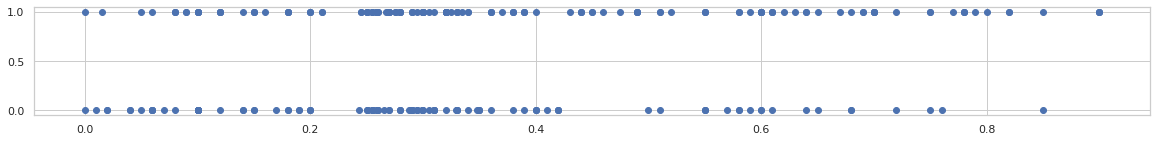

In [15]:
plt.figure(figsize=(20,2))

plt.scatter(students_train['SCG'], students_train['UNS'])

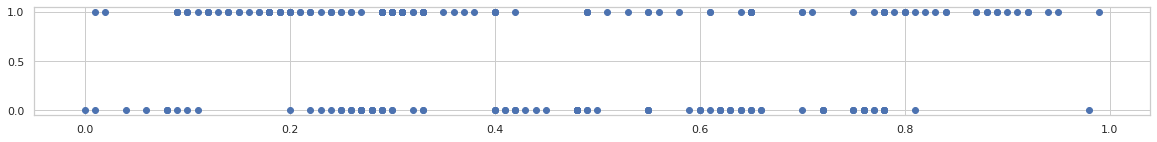

In [17]:
plt.figure(figsize=(20,2))

plt.scatter(students_train['LPR'], students_train['UNS'])

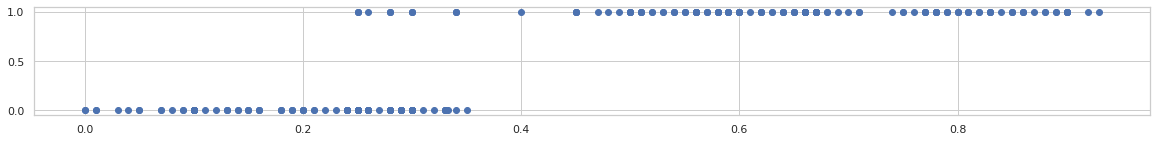

In [18]:
plt.figure(figsize=(20,2))

plt.scatter(students_train['PEG'], students_train['UNS'])

__5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

__6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [20]:
shrooms = pd.read_csv('agaricus-lepiota.data')
shrooms_copy = shrooms.copy()
shrooms.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in shrooms:
    le.fit(shrooms[column])
    shrooms[column] = le.transform(shrooms[column])

In [22]:
def count_accuracy(y1, y2):
    true_ans = y1 == y2
    return true_ans.sum() / len(y2)

__8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score

In [25]:
feature_types = np.array(['real' for _ in range(23)])
real_dt = hw5code.DecisionTree(feature_types)
real_dt.fit(X_train, y_train)
print(count_accuracy(real_dt.predict(X_test), y_test))

feature_types = np.array(['categorical' for _ in range(23)])
categorical_dt = hw5code.DecisionTree(feature_types)
categorical_dt.fit(X_train, y_train)
print(count_accuracy(categorical_dt.predict(X_test), y_test))

# Жуткий слайс, чтобы избавиться от ответа в первом столбце. Можно сделать более читаемым,
X_dummies = pd.get_dummies(shrooms_copy).to_numpy()[:, 1:len(pd.get_dummies(shrooms_copy).to_numpy())]
X_d_train, X_d_test, y_d_train, y_d_test = train_test_split(X_dummies, y, test_size=0.5, random_state=42)

feature_types = np.array(['real' for _ in range(X_dummies.shape[1])])
one_hot_dt = hw5code.DecisionTree(feature_types)
one_hot_dt.fit(X_d_train, y_d_train)
print(count_accuracy(one_hot_dt.predict(X_d_test), y_d_test))

sk_dt = DecisionTreeClassifier()
sk_dt.fit(X_train, y_train)
print(count_accuracy(sk_dt.predict(X_test), y_test))
#cross_val_score(sk_dt, X_test, y_test, scoring=make_scorer(accuracy_score))

1.0
1.0
1.0
1.0


In [26]:
anime_nurses = pd.read_csv('nursery.data')
y = anime_nurses['recommend']
anime_nurses.drop(columns=['recommend'])

,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended
0,usual,proper,complete,1,convenient,convenient,nonprob,priority
1,usual,proper,complete,1,convenient,convenient,nonprob,not_recom
2,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended
3,usual,proper,complete,1,convenient,convenient,slightly_prob,priority
4,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom
...,...,...,...,...,...,...,...,...
12954,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom
12956,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,priority


In [27]:
y = y.replace('not_recom', 0)
y = y.replace('recommend', 0)
y = y.replace('very_recom', 1)
y = y.replace('priority', 1)
y = y.replace('spec_prior', 1)

le = LabelEncoder()
for column in anime_nurses:
    le.fit(anime_nurses[column])
    anime_nurses[column] = le.transform(anime_nurses[column])

In [28]:
X = anime_nurses.copy().to_numpy()
y = y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

feature_types = np.array(['real' for _ in range(23)])
real_dt = hw5code.DecisionTree(feature_types)
real_dt.fit(X_train, y_train)
print(count_accuracy(real_dt.predict(X_test), y_test))

feature_types = np.array(['categorical' for _ in range(23)])
categorical_dt = hw5code.DecisionTree(feature_types)
categorical_dt.fit(X_train, y_train)
print(count_accuracy(categorical_dt.predict(X_test), y_test))

X_dummies = pd.get_dummies(anime_nurses).to_numpy()
X_d_train, X_d_test, y_d_train, y_d_test = train_test_split(X_dummies, y, test_size=0.5, random_state=42)

feature_types = np.array(['real' for _ in range(X_dummies.shape[1])])
one_hot_dt = hw5code.DecisionTree(feature_types)
one_hot_dt.fit(X_d_train, y_d_train)
print(count_accuracy(one_hot_dt.predict(X_d_test), y_d_test))

sk_dt = DecisionTreeClassifier()
sk_dt.fit(X_train, y_train)
print(count_accuracy(sk_dt.predict(X_test), y_test))


1.0
1.0
1.0
1.0


In [29]:
car = pd.read_csv('car.data')
#y = anime_nurses['recommend']
#anime_nurses.drop(columns=['recommend'])
car

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


__10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?